In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import tree
import graphviz
import os
os.environ["PATH"] += os.pathsep + 'F:/Data Analytics-MS!/Integrated Experiential Learn/Week 5 & 6/release/bin'
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import recall_score
#from imblearn.over_sampling import SMOTE

G:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df1 = pd.read_csv('F:/Data Analytics-MS!/Integrated Experiential Learn/Week 5 & 6/indicator_pairs_data updated.csv')
df2 = pd.read_csv('F:/Data Analytics-MS!/Integrated Experiential Learn/Week 5 & 6/obfuscated_demo_data2.csv')

In [3]:
df = pd.merge(df1, df2, on='employee_id', how = 'inner')

In [4]:
df['alert_type'].value_counts()

Atomic          92594
Daily_Heat      16379
Weekly_Heat     11681
Monthly_Heat    11428
Name: alert_type, dtype: int64

In [5]:
dfd = df.copy()
dfw = df.copy()
dfm = df.copy()
dfd = dfd[dfd['alert_type'] != 'Atomic'] 
dfd = dfd[dfd['alert_type'] == 'Daily_Heat'] 
dfw = dfw[dfw['alert_type'] != 'Atomic'] 
dfw = dfw[dfw['alert_type'] == 'Weekly_Heat'] 
dfm = dfm[dfm['alert_type'] != 'Atomic'] 
dfm = dfm[dfm['alert_type'] == 'Monthly_Heat'] 

In [6]:
dfd['Dates'] = pd.to_datetime(dfd['ge_hire_date']).dt.date
dfd['Time'] = pd.to_datetime(dfd['ge_hire_date']).dt.time
dfd['year'] = pd.DatetimeIndex(dfd['Dates']).year
dfd['Tenure'] = dfd.apply(lambda row: 2020 - row.year, axis = 1) 
dfd['year'] = dfd['year'].fillna(0).astype(int)
dfd['Tenure'] = dfd['Tenure'].fillna(0).astype(int)
dfd = dfd.drop(['alert_id_fk', 'insert_date', 'employee_id', 'alert_escalation_date', 'ge_hire_date', 'city', 'state_name', 'country_name', 'alert_category', 'year', 'Time', 'Dates'], axis=1)

In [7]:
#One-hot Encoding
dfd = pd.get_dummies(dfd)

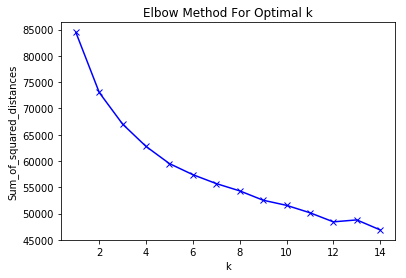

In [8]:
mms = MinMaxScaler()
mms.fit(dfd)
data_transformed = mms.transform(dfd)

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [9]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(data_transformed)
labels = kmeans.labels_

dfd['clusters'] = labels

kmeans_mean_cluster = pd.DataFrame(round(dfd.groupby('clusters').count()))
kmeans_mean_cluster


,score,risk_factor,avg_score,Tenure,owner_name_Analyst_1,owner_name_Analyst_3,owner_name_Analyst_4,owner_name_Analyst_6,owner_name_Analyst_7,owner_name_Analyst_8,...,industry_focus_name_BUSINESS_SEGMENT_10,industry_focus_name_BUSINESS_SEGMENT_11,industry_focus_name_BUSINESS_SEGMENT_12,industry_focus_name_BUSINESS_SEGMENT_13,industry_focus_name_BUSINESS_SEGMENT_14,industry_focus_name_BUSINESS_SEGMENT_4,industry_focus_name_BUSINESS_SEGMENT_5,industry_focus_name_BUSINESS_SEGMENT_6,industry_focus_name_BUSINESS_SEGMENT_7,industry_focus_name_BUSINESS_SEGMENT_8
clusters,,,,,,,,,,,,,,,,,,,,,
0,3053,3053,3053,3053,3053,3053,3053,3053,3053,3053,...,3053,3053,3053,3053,3053,3053,3053,3053,3053,3053
1,3717,3717,3717,3717,3717,3717,3717,3717,3717,3717,...,3717,3717,3717,3717,3717,3717,3717,3717,3717,3717
2,5287,5287,5287,5287,5287,5287,5287,5287,5287,5287,...,5287,5287,5287,5287,5287,5287,5287,5287,5287,5287
3,2910,2910,2910,2910,2910,2910,2910,2910,2910,2910,...,2910,2910,2910,2910,2910,2910,2910,2910,2910,2910
4,1412,1412,1412,1412,1412,1412,1412,1412,1412,1412,...,1412,1412,1412,1412,1412,1412,1412,1412,1412,1412


In [10]:
export_csv = kmeans_mean_cluster.to_csv (r'F:\Data Analytics-MS!\Integrated Experiential Learn\Final Submissions\clustering_heat_daily.csv', index = None, header=True)

In [11]:
dfw['Dates'] = pd.to_datetime(dfw['ge_hire_date']).dt.date
dfw['Time'] = pd.to_datetime(dfw['ge_hire_date']).dt.time
dfw['year'] = pd.DatetimeIndex(dfw['Dates']).year
dfw['Tenure'] = dfw.apply(lambda row: 2020 - row.year, axis = 1) 
dfw['year'] = dfw['year'].fillna(0).astype(int)
dfw['Tenure'] = dfw['Tenure'].fillna(0).astype(int)
dfw = dfw.drop(['alert_id_fk', 'insert_date', 'employee_id', 'alert_escalation_date', 'ge_hire_date', 'city', 'state_name', 'country_name', 'alert_category', 'year', 'Time', 'Dates'], axis=1)

In [12]:
#One-hot Encoding
dfw = pd.get_dummies(dfw)

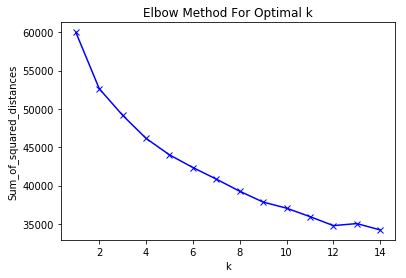

In [13]:
mms = MinMaxScaler()
mms.fit(dfw)
data_transformed = mms.transform(dfw)

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [14]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(data_transformed)
labels = kmeans.labels_

dfw['clusters'] = labels

kmeans_mean_cluster2 = pd.DataFrame(round(dfw.groupby('clusters').sum()))
kmeans_mean_cluster2

,score,risk_factor,avg_score,Tenure,owner_name_Analyst_1,owner_name_Analyst_3,owner_name_Analyst_4,owner_name_Analyst_6,owner_name_Analyst_7,owner_name_Analyst_8,...,career_band_CAREER_BAND_9,industry_focus_name_BUSINESS_SEGMENT_1,industry_focus_name_BUSINESS_SEGMENT_10,industry_focus_name_BUSINESS_SEGMENT_11,industry_focus_name_BUSINESS_SEGMENT_12,industry_focus_name_BUSINESS_SEGMENT_14,industry_focus_name_BUSINESS_SEGMENT_4,industry_focus_name_BUSINESS_SEGMENT_6,industry_focus_name_BUSINESS_SEGMENT_7,industry_focus_name_BUSINESS_SEGMENT_8
clusters,,,,,,,,,,,,,,,,,,,,,
0,4887728,9990.0,561566,0,91.0,0.0,323.0,17.0,138.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,744.0,0.0,26.0,0.0
1,24213682,54372.0,1715818,74817,101.0,0.0,712.0,423.0,1142.0,398.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3920.0,0.0,0.0,0.0
2,1478339,7673.0,186237,11815,29.0,0.0,363.0,192.0,70.0,42.0,...,3.0,0.0,0.0,0.0,0.0,0.0,923.0,0.0,0.0,0.0
3,15902233,23179.0,1766648,0,94.0,0.0,421.0,231.0,495.0,290.0,...,0.0,0.0,0.0,7.0,0.0,0.0,1897.0,0.0,0.0,0.0
4,16297251,49777.0,1343612,33761,199.0,14.0,630.0,536.0,1379.0,647.0,...,0.0,18.0,13.0,20.0,11.0,1.0,4028.0,26.0,0.0,47.0


In [15]:
export_csv = kmeans_mean_cluster2.to_csv (r'F:\Data Analytics-MS!\Integrated Experiential Learn\Final Submissions\clustering_heat_weekly.csv', index = None, header=True)

In [16]:
dfm['Dates'] = pd.to_datetime(dfm['ge_hire_date']).dt.date
dfm['Time'] = pd.to_datetime(dfm['ge_hire_date']).dt.time
dfm['year'] = pd.DatetimeIndex(dfm['Dates']).year
dfm['Tenure'] = dfm.apply(lambda row: 2020 - row.year, axis = 1) 
dfm['year'] = dfm['year'].fillna(0).astype(int)
dfm['Tenure'] = dfm['Tenure'].fillna(0).astype(int)
dfm = dfm.drop(['alert_id_fk', 'insert_date', 'employee_id', 'alert_escalation_date', 'ge_hire_date', 'city', 'state_name', 'country_name', 'alert_category', 'year', 'Time', 'Dates'], axis=1)

In [17]:
#One-hot Encoding
dfm = pd.get_dummies(dfm)

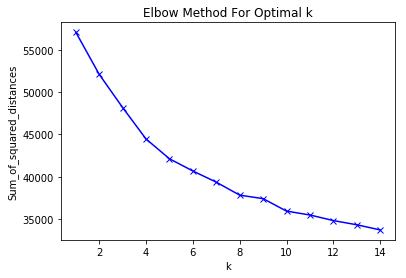

In [18]:
mms = MinMaxScaler()
mms.fit(dfm)
data_transformed = mms.transform(dfm)

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [19]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(data_transformed)
labels = kmeans.labels_

dfm['clusters'] = labels

kmeans_mean_cluster3 = pd.DataFrame(round(dfm.groupby('clusters').sum()))
kmeans_mean_cluster3

,score,risk_factor,avg_score,Tenure,owner_name_Analyst_1,owner_name_Analyst_2,owner_name_Analyst_3,owner_name_Analyst_4,owner_name_Analyst_6,owner_name_Analyst_7,...,career_band_CAREER_BAND_7,career_band_CAREER_BAND_8,career_band_CAREER_BAND_9,industry_focus_name_BUSINESS_SEGMENT_1,industry_focus_name_BUSINESS_SEGMENT_10,industry_focus_name_BUSINESS_SEGMENT_11,industry_focus_name_BUSINESS_SEGMENT_4,industry_focus_name_BUSINESS_SEGMENT_6,industry_focus_name_BUSINESS_SEGMENT_7,industry_focus_name_BUSINESS_SEGMENT_8
clusters,,,,,,,,,,,,,,,,,,,,,
0,14382711,31518.0,890005,24974,64.0,0.0,0.0,561.0,87.0,36.0,...,195.0,263.0,0.0,0.0,0.0,0.0,1918.0,0.0,0.0,20.0
1,23563243,65585.0,1110616,31146,272.0,0.0,8.0,1224.0,524.0,742.0,...,339.0,498.0,0.0,24.0,1.0,5.0,3445.0,38.0,0.0,23.0
2,19050401,29769.0,1202803,0,124.0,0.0,0.0,370.0,161.0,297.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1413.0,15.0,36.0,0.0
3,56390117,89295.0,2304700,90102,292.0,2.0,0.0,1452.0,648.0,897.0,...,25.0,16.0,1.0,0.0,0.0,0.0,4490.0,0.0,0.0,0.0


In [20]:
export_csv = kmeans_mean_cluster3.to_csv (r'F:\Data Analytics-MS!\Integrated Experiential Learn\Final Submissions\clustering_heat_monthly.csv', index = None, header=True)